So far everything we've worked with has been nicely formatted for us already by Keras.

Let's explore what its like to work with a more realistic data set.

## The Data

-----------

## PLEASE NOTE: THIS DATASET IS VERY LARGE. IT CAN BE DOWNLOADED FROM THE PREVIOUS LECTURE. PLEASE WATCH THE VIDEO LECTURE ON HOW TO GET THE DATA.

## USE OUR VERSION OF THE DATA. WE ALREADY ORGANIZED IT FOR YOU!!

--------
----------
--------

ORIGINAL DATA SOURCE:

The dataset contains 2 folders - Infected - Uninfected

And a total of 27,558 images.

Acknowledgements
This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/ 

**Note: We will be dealing with real image files, NOT numpy arrays. Which means a large part of this process will be learning how to work with and deal with large groups of image files. This is too much data to fit in memory as a numpy array, so we'll need to feed it into our model in batches. **

### Visualizing the Data

In [9]:
## whether a cell has been afected by maleria or not

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf

%matplotlib inline

In [151]:
source_path = r'./project/'

In [152]:
os.listdir(source_path)

['test', 'train']

In [5]:
from matplotlib.image import imread

In [43]:
trainpath = os.path.join(source_path, 'train')
testpath = os.path.join(source_path, 'test')

In [44]:
os.listdir(trainpath), os.listdir(testpath)

(['parasitized', 'uninfected'], ['parasitized', 'uninfected'])

In [45]:
## lets see an ingfetcted image

In [69]:
para_image = os.listdir(os.path.join(trainpath, 'parasitized'))[0]

In [70]:
para_image = imread(os.path.join(trainpath, 'parasitized', para_image))

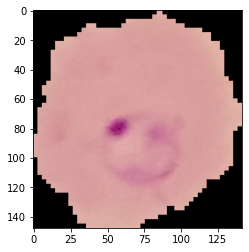

In [71]:
plt.imshow(para_image)

In [73]:
para_image.shape

(148, 142, 3)

In [50]:
## lets see an uninfected image/

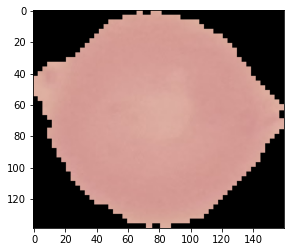

In [51]:
uninf_image = os.listdir(os.path.join(trainpath, 'uninfected'))[0]
uninf_image = imread(os.path.join(trainpath, 'uninfected', uninf_image))
plt.imshow(uninf_image)

In [52]:
total_train_infected_images = len(os.listdir(os.path.join(trainpath, 'parasitized')))
total_train_infected_images

12479

In [53]:
total_train_uninfected_images = len(os.listdir(os.path.join(trainpath, 'uninfected')))
total_train_uninfected_images

12479

In [54]:
total_test_infected_images = len(os.listdir(os.path.join(testpath, 'parasitized')))
total_test_infected_images

1300

In [55]:
total_test_uninfected_images = len(os.listdir(os.path.join(testpath, 'uninfected')))
total_test_uninfected_images

1300

In [56]:
#3 finding out avg file size in our train dataset
# Other options: https://stackoverflow.com/questions/1507084/how-to-check-dimensions-of-all-images-in-a-directory-using-python
dim1 = []
dim2 = []

for image_name in os.listdir(os.path.join(trainpath, 'uninfected')):
    img = imread(os.path.join(trainpath, 'uninfected', image_name))
    image_shape = img.shape  ##(width, height, color_channel)
    
    dim1.append(image_shape[0])
    dim2.append(image_shape[1])
                             

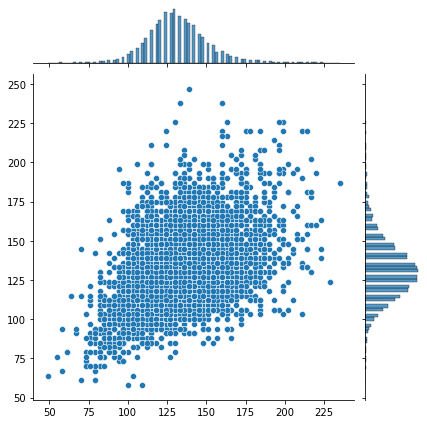

In [58]:
sns.jointplot(x=dim1, y=dim2)

In [59]:
np.mean(dim1), np.mean(dim2)

(131.64820899110507, 131.4041990544114)

In [60]:
final_image_shape = (130, 130, 3)

## Preparing the Data for the model

There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us. Check out the documentation for a full list of all the parameters you can use here!

### image preprocesing

In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [65]:
# ImageDataGenerator?

In [78]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
#                                rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

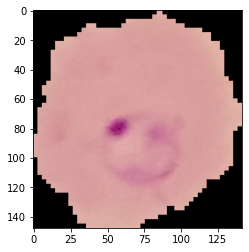

In [79]:
plt.imshow(para_image)

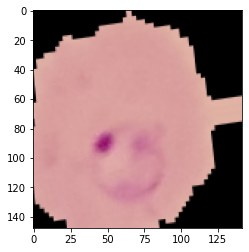

In [80]:
plt.imshow(image_gen.random_transform(para_image))

### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [81]:
## how to pass the flow of train to imagegenerator
image_gen.flow_from_directory(trainpath)

Found 24958 images belonging to 2 classes.


In [82]:
image_gen.flow_from_directory(testpath)

Found 2600 images belonging to 2 classes.


### creating model

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [97]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

##oncv layers,  note: input_shape is required only in 1st layer, for the rest layer keras wil handle
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=final_image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=final_image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=final_image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [98]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            

In [99]:
from tensorflow.keras.callbacks import EarlyStopping

In [100]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [101]:
help(image_gen.flow_from_directory)

Help on method flow_from_directory in module tensorflow.python.keras.preprocessing.image:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest') method of tensorflow.python.keras.preprocessing.image.ImageDataGenerator instance
    Takes the path to a directory & generates batches of augmented data.
    
    Arguments:
        directory: string, path to the target directory. It should contain one
          subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images inside
          each of the subdirectories directory tree will be included in the
          generator. See [this script](
            https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
              for more details.
        target_size: Tuple of integers `(height, width)`, defaults to `(256,
         

##training model

In [102]:
batch_size = 16

In [103]:
train_image_gen = image_gen.flow_from_directory(trainpath,
                                               target_size=final_image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [104]:
test_image_gen = image_gen.flow_from_directory(testpath,
                                               target_size=final_image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [105]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [106]:
import warnings
warnings.filterwarnings('ignore')

In [107]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 930s 596ms/step - loss: 0.8210 - accuracy: 0.5419 - val_loss: 0.6805 - val_accuracy: 0.5804
Epoch 2/20
1560/1560 [==============================] - 256s 164ms/step - loss: 0.6785 - accuracy: 0.5802 - val_loss: 0.6708 - val_accuracy: 0.5912
Epoch 3/20
1560/1560 [==============================] - 257s 164ms/step - loss: 0.6739 - accuracy: 0.5857 - val_loss: 0.6703 - val_accuracy: 0.5938
Epoch 4/20
1560/1560 [==============================] - 255s 164ms/step - loss: 0.6749 - accuracy: 0.5984 - val_loss: 0.6716 - val_accuracy: 0.5877
Epoch 5/20
1560/1560 [==============================] - 257s 164ms/step - loss: 0.6683 - accuracy: 0.6020 - val_loss: 0.6681 - val_accuracy: 0.5942
Epoch 6/20
1560/1560 [==============================] - 264s 169ms/step - loss: 0.6674 - accuracy: 0.6015 - val_loss: 0.6712 - val_accuracy: 0.5912
Epoch 7/20
1560/1560 [==============================] - 261s 167ms/step - loss: 0.5258 - accuracy: 0.7321 - val_

In [108]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            

### model evaluation

In [109]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

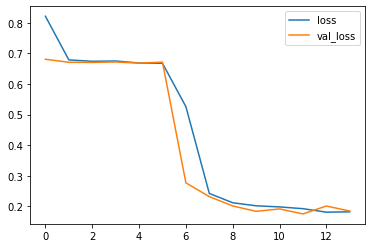

In [110]:
losses[['loss','val_loss']].plot()

In [111]:
model.metrics_names

['loss', 'accuracy']

In [112]:
model.evaluate_generator(test_image_gen)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.18167611956596375, 0.9411538243293762]

In [113]:
from tensorflow.keras.models import load_model
model.save('malaria_detector.h5')

In [114]:
from tensorflow.keras.preprocessing import image

In [115]:
# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras
pred_probabilities = model.predict_generator(test_image_gen)

Instructions for updating:
Please use Model.predict, which supports generators.


In [116]:
pred_probabilities

array([[1.1979896e-05],
       [2.2954359e-03],
       [4.4857487e-04],
       ...,
       [9.2757666e-01],
       [9.0467852e-01],
       [9.6672708e-01]], dtype=float32)

In [117]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [118]:
predictions = pred_probabilities > 0.5

In [119]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [120]:
from sklearn.metrics import classification_report,confusion_matrix

In [121]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1300
           1       0.93      0.95      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [122]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1203,   97],
       [  60, 1240]], dtype=int64)

# Predicting on an Image

In [135]:
para_cell = r'C:\Users\user\Downloads\Compressed\cell_images\cell_images\test\parasitized\C37BP2_thinF_IMG_20150620_133001a_cell_76.png'

In [136]:
my_image = image.load_img(para_cell,target_size=final_image_shape)

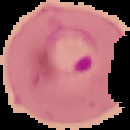

In [137]:
my_image

In [138]:
type(my_image)

PIL.Image.Image

In [139]:
my_image = image.img_to_array(my_image)

In [140]:
type(my_image)

numpy.ndarray

In [141]:
my_image.shape

(130, 130, 3)

In [142]:
my_image = np.expand_dims(my_image, axis=0) ## to expand the extra dimnetion

In [143]:
my_image.shape

(1, 130, 130, 3)

In [144]:
model.predict(my_image)

array([[1.18802106e-07]], dtype=float32)

In [150]:
np.argmax(model.predict(my_image), axis=-1)

array([0], dtype=int64)

In [145]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [146]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}